    Dataset : Titanic Dataset

Evaluating Logistic Regression with Cross-Validation

Exercise: 01
- Implement logistic regression and evaluate the model using k-fold cross-validation.
- Compare the cross-validation scores with a single train-test split evaluation.
- Analyzing Overfitting and Underfitting in Decision Trees

Exercise: 2
- Train a decision tree classifier with varying depths to analyze overfitting and underfitting.
- Plot training and validation accuracies to visualize the effects.
- Calculating Precision, Recall, and F1-Score for Logistic Regression

Exercise: 3
- Implement logistic regression and calculate precision, recall, and F1-score for the model.
- Tip: Discuss how these metrics provide insights into model performance in  your week article.

- ROC Curve Analysis for Decision Trees

Exercise: 4
- Implement a decision tree classifier and plot the ROC curve.
- Compute the AUC (Area Under the Curve) and interpret the results.
- Comparing Model Performance with and without Cross-Validation

Exercise: 5

- Train logistic regression and decision tree models with and without cross-validation.
- Compare their performance metrics, including accuracy, precision, and recall.


# Imports and Data Loading



In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the dataset
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

# Exploratory Data Analysis (EDA)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Handling Missing Values

In [ ]:
# Checking for missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
train.shape

(891, 12)

<Axes: >

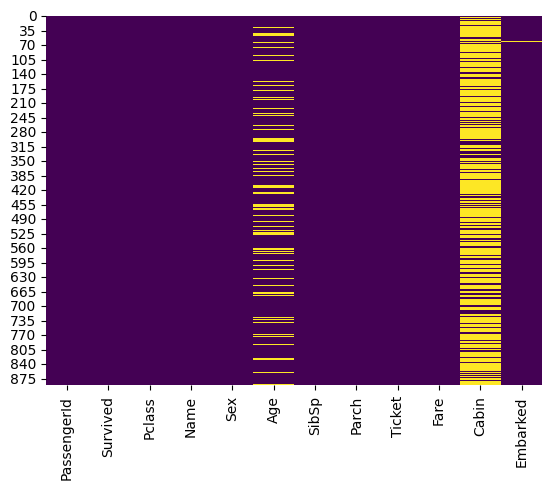

In [ ]:
# Visualizing missing data
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')

In [ ]:
# For 'Age', we can use the median to fill missing values
imputer = SimpleImputer(strategy='median')
train['Age'] = imputer.fit_transform(train[['Age']])
test['Age'] = imputer.transform(test[['Age']])

In [ ]:
# For 'Embarked', we can use the most frequent value
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [ ]:
# For 'Fare' in test set, use the median
test['Fare'].fillna(test['Fare'].median(), inplace=True)

# Feature Engineering

**DROP CABIN VALUE SINCE ITS MOSTY CONTAINS NAN VALUES**

In [ ]:
train.drop('Cabin',axis=1,inplace=True)

In [ ]:
test.drop('Cabin',axis=1,inplace=True)

In [ ]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
train.drop(["PassengerId",'Ticket'],axis=1,inplace=True)

In [ ]:
test.drop('Ticket',axis=1,inplace=True)

In [36]:
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

# Handling Outliers

In [39]:
# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [40]:
# Removing outliers from the 'Fare' column
train_no_outliers = remove_outliers(train, 'Fare')

# Check the shape of the data before and after removing outliers
print(f"Original train shape: {train.shape}")
print(f"Shape after removing outliers: {train_no_outliers.shape}")

Original train shape: (891, 8)
Shape after removing outliers: (775, 8)


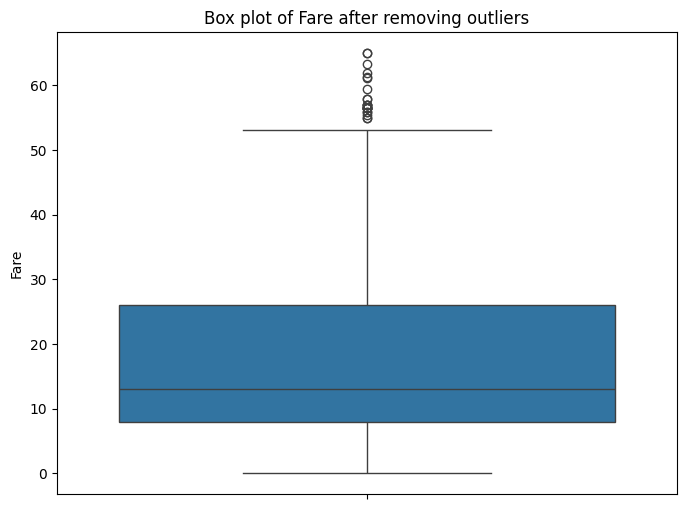

In [41]:
# Box plot after removing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_no_outliers['Fare'])
plt.title('Box plot of Fare after removing outliers')
plt.show()

# Encoding for Categorical data

In [42]:
# Convert categorical variables into numerical
le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])
test['Sex'] = le.transform(test['Sex'])
train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)
test = pd.get_dummies(test, columns=['Embarked'], drop_first=True)

# Data Splitting

In [43]:
# Splitting data into features and target variable
X = train.drop('Survived', axis=1)
y = train['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
test = scaler.transform(test.drop('PassengerId', axis=1))

# Model Training




### **Logistic Regression**

In [45]:
# Logistic Regression
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_val)
accuracy_logreg = accuracy_score(y_val, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)

Logistic Regression Accuracy: 0.8100558659217877


### **Decision Tree Classifier**

In [50]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_val)
print(f'Decision Tree Accuracy: {accuracy_score(y_val, dt_pred):.4f}')

Decision Tree Accuracy: 0.7933


# Exercise 1

### Evaluating Logistic Regression with Cross-Validation

In [54]:
cv_scores = cross_val_score(logreg, X_train, y_train, cv=5)

print("Logistic Regression Cross-Validation Scores: ", cv_scores)
print("Mean CV Score: ", np.mean(cv_scores))

Logistic Regression Cross-Validation Scores:  [0.82517483 0.8041958  0.78873239 0.73943662 0.78873239]
Mean CV Score:  0.7892544075642667


### Train-test split evaluation

In [55]:
# Train-test split evaluation
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_val)
single_split_accuracy = accuracy_score(y_val, y_pred_logreg)

print("Single Split Accuracy: ", single_split_accuracy)

Single Split Accuracy:  0.8100558659217877


# Exercise 2

### Analyzing Overfitting and Underfitting in Decision Trees

In [56]:
train_acc = []
val_acc = []
depth_range = range(1, 21)

for depth in depth_range:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    train_acc.append(dt.score(X_train, y_train))
    val_acc.append(dt.score(X_val, y_val))


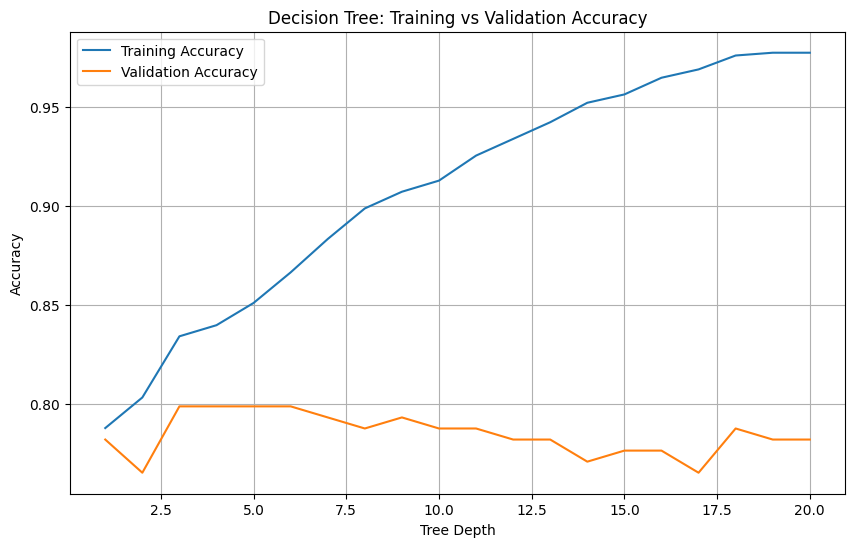

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_acc, label='Training Accuracy')
plt.plot(depth_range, val_acc, label='Validation Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree: Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Exercise 3

### Calculating Precision, Recall, and F1-Score for Logistic Regression

In [59]:
precision = precision_score(y_val, y_pred_logreg)
recall = recall_score(y_val, y_pred_logreg)
f1 = f1_score(y_val, y_pred_logreg)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Precision: 0.7857
Recall: 0.7432
F1-Score: 0.7639


# Exercise 4

### ROC Curve Analysis

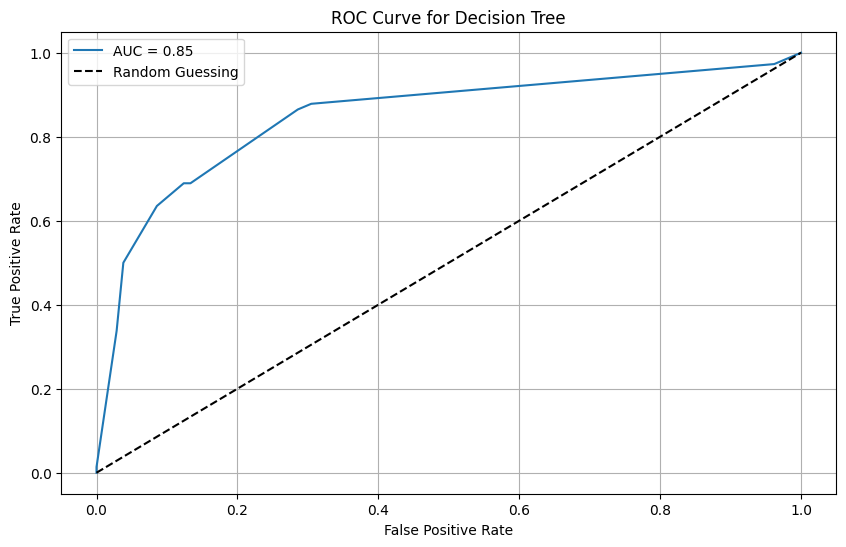

In [60]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)
y_pred_prob = dt.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend()
plt.grid(True)
plt.show()

# Exercise 5

### Comparing Model Performance with and without Cross-Validation

### Without Cross Validation

In [61]:
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_val)
accuracy_logreg = accuracy_score(y_val, y_pred_logreg)
precision_logreg = precision_score(y_val, y_pred_logreg)
recall_logreg = recall_score(y_val, y_pred_logreg)

print("Logistic Regression (Single Split) - Accuracy: ", accuracy_logreg)
print("Precision: ", precision_logreg)
print("Recall: ", recall_logreg)

Logistic Regression (Single Split) - Accuracy:  0.8100558659217877
Precision:  0.7857142857142857
Recall:  0.7432432432432432


### With Cross-Validation

In [62]:
cv_accuracy_logreg = np.mean(cross_val_score(logreg, X_train, y_train, cv=5))
print("Logistic Regression (Cross-Validation) - Mean Accuracy: ", cv_accuracy_logreg)

Logistic Regression (Cross-Validation) - Mean Accuracy:  0.7892544075642667


### Decision Tree without Cross-Validation

In [63]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_val)
accuracy_dt = accuracy_score(y_val, y_pred_dt)
precision_dt = precision_score(y_val, y_pred_dt)
recall_dt = recall_score(y_val, y_pred_dt)

print("Decision Tree (Single Split) - Accuracy: ", accuracy_dt)
print("Precision: ", precision_dt)
print("Recall: ", recall_dt)

Decision Tree (Single Split) - Accuracy:  0.7988826815642458
Precision:  0.8392857142857143
Recall:  0.6351351351351351


### Decision Tree with Cross-Validation

In [64]:
# Decision Tree with Cross-Validation
cv_accuracy_dt = np.mean(cross_val_score(dt, X_train, y_train, cv=5))
print("Decision Tree (Cross-Validation) - Mean Accuracy: ", cv_accuracy_dt)

Decision Tree (Cross-Validation) - Mean Accuracy:  0.806136117403723
